

**Predict Test Scores of Students:**

The objective is to predict the score of individual students in a particular test given a data set  which includes features such as, school setting, school type, gender, pretest scores etc.  


The dataset contains 12 columns

Target filed: posttest


Number of attributes: 11



About the Dataset:

1. school: contain different school name
2. school_setting: where the school is set urban or sub-urben or rural
3. school_type: define the school type
4. classroom: contain different classroom
5. teaching_method: shows type of teaching methode
6. n_student: Represent the mnumber of student
7. student_id: contains id of different individual student
8. gender	: represent the gender of a student
9. lunch: contains type of lunches
10. pretest: contains pretest score of a student
11. 1st column: contains unique alphabets








    



## Importing the Dependencies:

In [ ]:
import tensorflow as tf

In [ ]:
tf.test.gpu_device_name()

'/device:GPU:0'

In [1]:
#Basic Libraries for Machine Learning
import numpy as np 
import pandas as pd

# For Date Visualization and EDA
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go

# Importing sklearn library
import sklearn

# For Data Encoding
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

# For Correlation matrix
from scipy.stats import pearsonr

# For Scaling the datasets
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectKBest

# Splitting the datasets
from sklearn.model_selection import train_test_split

# For checking accuracy and confusion matrix
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report

#Cross-validation
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV 
from sklearn.pipeline import make_pipeline

from scipy.stats import uniform, randint

# For importing the models
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

# Data Collection and Pre-Processing:

In [3]:
# loading the dataset to pandas DataFrame
train = pd.read_csv('train.csv')

In [4]:
# printing the first 5 rows of the dataframe
train.head()

,any,school,school_setting,school_type,classroom,teaching_method,n_student,student_id,gender,lunch,pretest
0,1180,OJOBU,Rural,Public,6U9,Standard,22,KG40V,Female,Does not qualify,53
1,564,GJJHK,Suburban,Public,X78,Standard,21,SJ05X,Female,Qualifies for reduced/free lunch,54
2,39,ANKYI,Urban,Non-public,ZNS,Standard,21,VKX2N,Female,Does not qualify,62
3,1444,UAGPU,Suburban,Public,NWZ,Standard,21,V9D0M,Female,Does not qualify,58
4,1330,QOQTS,Urban,Public,SUR,Standard,28,SDWCT,Female,Does not qualify,52


In [5]:
# printing the last 5 rows of the dataframe
train.tail()

,any,school,school_setting,school_type,classroom,teaching_method,n_student,student_id,gender,lunch,pretest
2021,1033,KZKKE,Rural,Public,5JK,Standard,24,BC0AI,Male,Qualifies for reduced/free lunch,33
2022,1731,VHDHF,Rural,Non-public,KR1,Experimental,15,UV4VL,Male,Qualifies for reduced/free lunch,53
2023,763,GOOBU,Urban,Public,HKF,Standard,28,ZDEIJ,Female,Qualifies for reduced/free lunch,33
2024,835,GOOBU,Urban,Public,W8A,Experimental,26,RDNR9,Male,Qualifies for reduced/free lunch,36
2025,1653,UUUQX,Suburban,Non-public,P8I,Standard,20,8RSUD,Female,Does not qualify,65


In [6]:
# number of rows and columns
train.shape

(2026, 11)

In [7]:
# loading the train class label dataset to pandas DataFrame
train_class_labels = pd.read_csv('train_class_labels.csv')

In [8]:
# printing the first 5 rows of the dataframe
train_class_labels.head()

,any,posttest
0,1180,62
1,564,69
2,39,72
3,1444,69
4,1330,59


In [9]:
# number of rows and columns
train_class_labels.shape

(2026, 2)

Now we are going to merge the two datasets

In [10]:
score_dataset = pd.merge(train,train_class_labels)

In [11]:
# printing the first 5 rows of the dataframe
score_dataset.head()

,any,school,school_setting,school_type,classroom,teaching_method,n_student,student_id,gender,lunch,pretest,posttest
0,1180,OJOBU,Rural,Public,6U9,Standard,22,KG40V,Female,Does not qualify,53,62
1,564,GJJHK,Suburban,Public,X78,Standard,21,SJ05X,Female,Qualifies for reduced/free lunch,54,69
2,39,ANKYI,Urban,Non-public,ZNS,Standard,21,VKX2N,Female,Does not qualify,62,72
3,1444,UAGPU,Suburban,Public,NWZ,Standard,21,V9D0M,Female,Does not qualify,58,69
4,1330,QOQTS,Urban,Public,SUR,Standard,28,SDWCT,Female,Does not qualify,52,59


In [12]:
# printing the last 5 rows of the dataframe
score_dataset.tail()

,any,school,school_setting,school_type,classroom,teaching_method,n_student,student_id,gender,lunch,pretest,posttest
2021,1033,KZKKE,Rural,Public,5JK,Standard,24,BC0AI,Male,Qualifies for reduced/free lunch,33,45
2022,1731,VHDHF,Rural,Non-public,KR1,Experimental,15,UV4VL,Male,Qualifies for reduced/free lunch,53,68
2023,763,GOOBU,Urban,Public,HKF,Standard,28,ZDEIJ,Female,Qualifies for reduced/free lunch,33,40
2024,835,GOOBU,Urban,Public,W8A,Experimental,26,RDNR9,Male,Qualifies for reduced/free lunch,36,51
2025,1653,UUUQX,Suburban,Non-public,P8I,Standard,20,8RSUD,Female,Does not qualify,65,78


In [13]:
# number of rows and columns
score_dataset.shape

(2026, 12)

Now we are going to remove the first column as that is just a Serial/any number and the student_id column as it has all unique values.

In [14]:
# drop the "any" column from the dataFrame
score_dataset = score_dataset.drop(columns='any', axis=1)

In [15]:
# drop the "student_id" column from the dataFrame
score_dataset = score_dataset.drop(columns='student_id', axis=1)

In [16]:
# number of rows and columns
score_dataset.shape

(2026, 10)

In [17]:
score_dataset.columns

Index(['school', 'school_setting', 'school_type', 'classroom',
       'teaching_method', 'n_student', 'gender', 'lunch', 'pretest',
       'posttest'],
      dtype='object')

In [18]:
score_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2026 entries, 0 to 2025
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   school           2026 non-null   object
 1   school_setting   2026 non-null   object
 2   school_type      2026 non-null   object
 3   classroom        2026 non-null   object
 4   teaching_method  2026 non-null   object
 5   n_student        2026 non-null   int64 
 6   gender           2026 non-null   object
 7   lunch            2026 non-null   object
 8   pretest          2026 non-null   int64 
 9   posttest         2026 non-null   int64 
dtypes: int64(3), object(7)
memory usage: 174.1+ KB


From the above, we can see that there are 3 numerical column and 7 categorical column

In [20]:
# statistical measures
score_dataset.describe()

,n_student,pretest,posttest
count,2026.000000,2026.000000,2026.000000
mean,22.776407,54.974827,67.099704
std,4.226998,13.611210,14.043352
min,14.000000,22.000000,32.000000
25%,20.000000,44.000000,56.000000
50%,22.000000,56.000000,68.000000
75%,27.000000,65.000000,77.000000
max,31.000000,93.000000,100.000000


In [21]:
score_dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
n_student,2026.0,22.776407,4.226998,14.0,20.0,22.0,27.0,31.0
pretest,2026.0,54.974827,13.611210,22.0,44.0,56.0,65.0,93.0
posttest,2026.0,67.099704,14.043352,32.0,56.0,68.0,77.0,100.0


In [22]:
# number of missing values in each column
score_dataset.isnull().sum()

school             0
school_setting     0
school_type        0
classroom          0
teaching_method    0
n_student          0
gender             0
lunch              0
pretest            0
posttest           0
dtype: int64

# Handling the Missing values:

Since there is no missing values in our data set.

# Data Analysis and Data Visualization:

## For the Categorical Columns:

Categorical Features:
- school
- school_setting
- school_type
- classroom
- teaching_method
- lunch
- gender


In [23]:
category_col=['school','school_setting','school_type', 'classroom', 'teaching_method', 'lunch', 'gender']
l=[]
for i in category_col:
    print('-------------------')
    print(i)
    print('-------------------')
    print((score_dataset.value_counts()))
    print('------------------------------------------------------------------')


-------------------
school
-------------------
school  school_setting  school_type  classroom  teaching_method  n_student  gender  lunch                             pretest  posttest
IDGFP   Urban           Non-public   05H        Standard         22         Male    Does not qualify                  74       85          5
ZOWMK   Urban           Public       Q0E        Experimental     30         Female  Qualifies for reduced/free lunch  38       53          3
KZKKE   Rural           Public       QTU        Standard         23         Male    Qualifies for reduced/free lunch  32       41          2
OJOBU   Rural           Public       6U9        Standard         22         Male    Does not qualify                  47       58          2
CIMBB   Urban           Non-public   EID        Standard         21         Female  Does not qualify                  69       79          2
                                                                                                                

<function matplotlib.pyplot.show(close=None, block=None)>

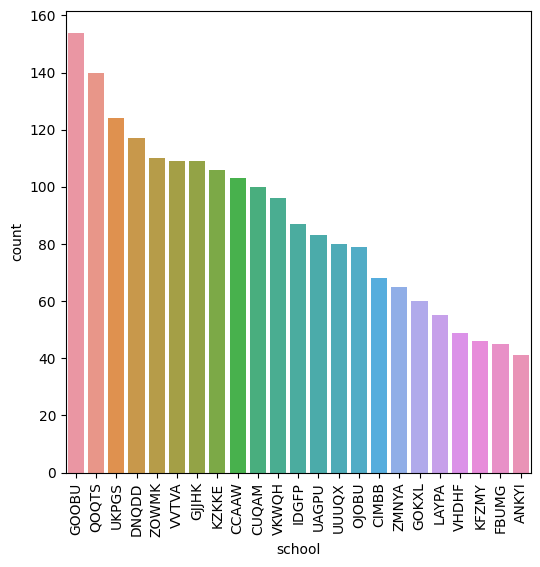

In [24]:
#making a countplot for "school" column
plt.figure(figsize=(6,6))
sns.countplot(x='school', data=score_dataset, order = score_dataset['school'].value_counts().index)
plt.xticks(rotation=90);
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

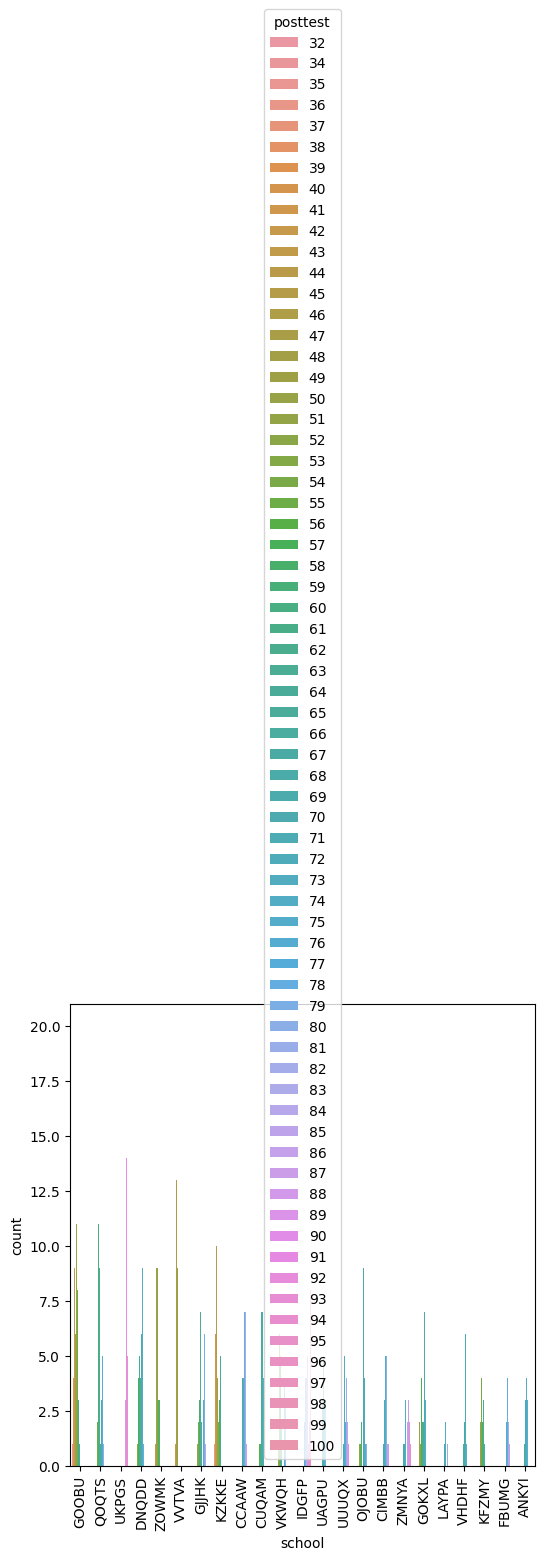

In [25]:
#making a countplot for "school" with respect to "posttest" column
plt.figure(figsize=(6,6))
sns.countplot(x='school', data=score_dataset, order = score_dataset['school'].value_counts().index,
              hue=score_dataset['posttest'])
plt.xticks(rotation=90);
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

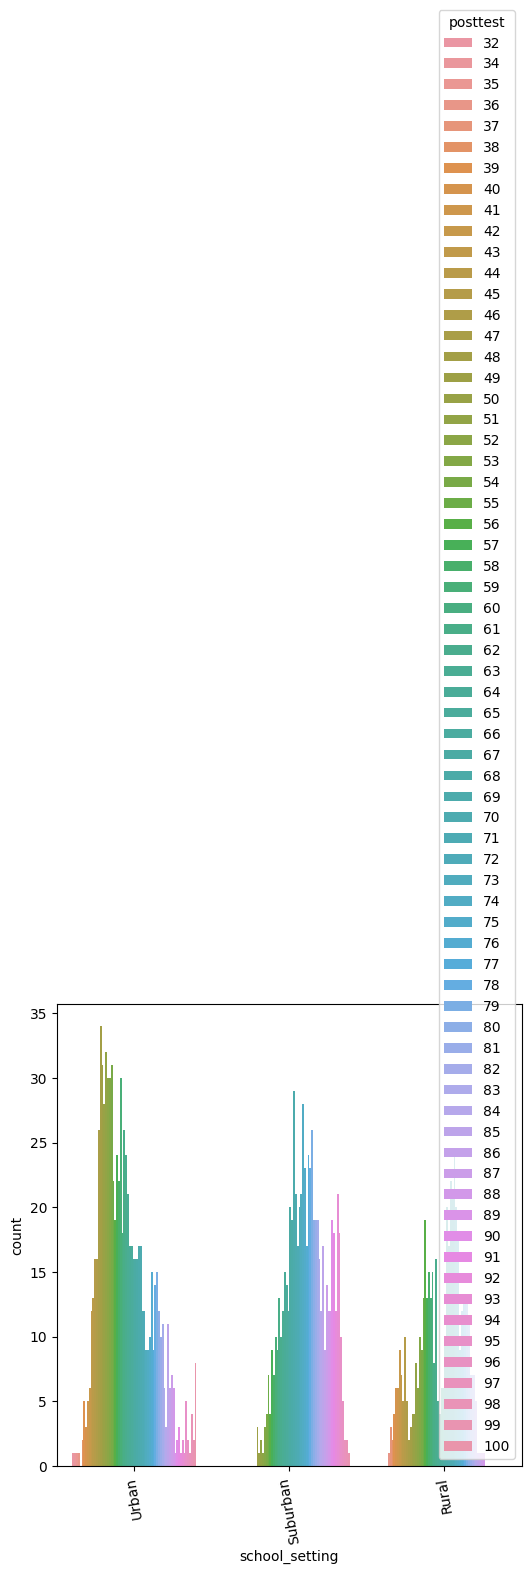

In [26]:
#making a countplot for "school_setting" with respect to "posttest" column
plt.figure(figsize=(6,6))
sns.countplot(x='school_setting', data=score_dataset, order = score_dataset['school_setting'].value_counts().index,
              hue=score_dataset['posttest'])
plt.xticks(rotation=100);
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

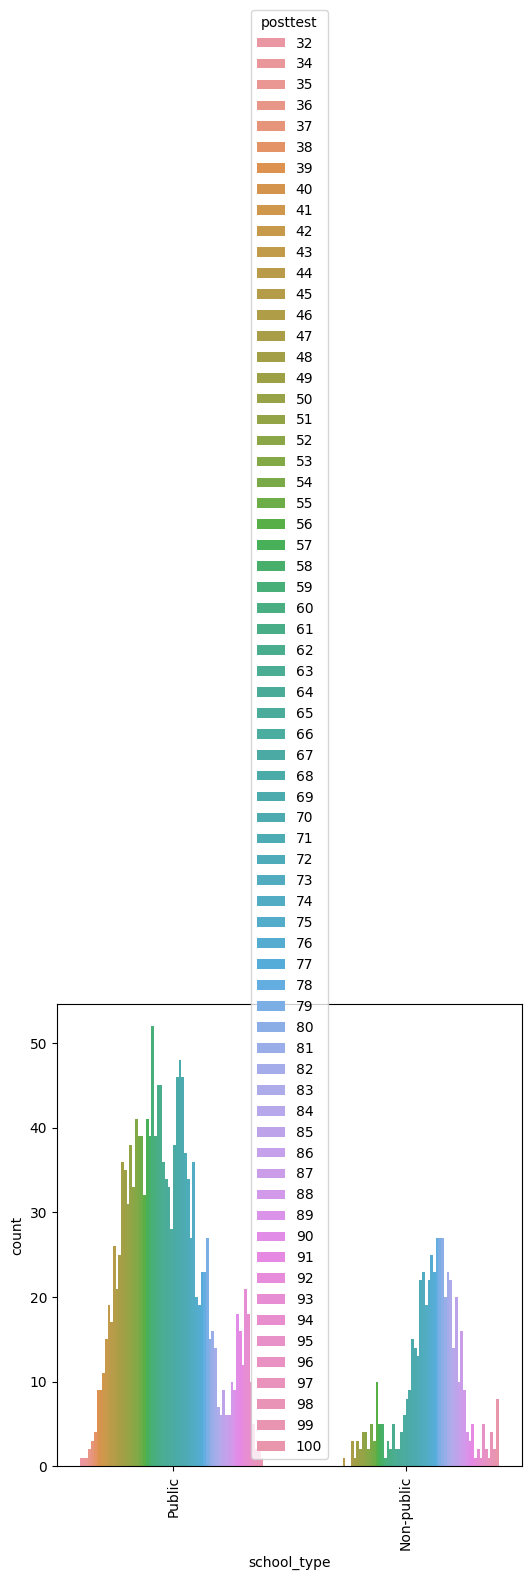

In [27]:
#making a countplot for "school_type" with respect to "posttest" column
plt.figure(figsize=(6,6))
sns.countplot(x='school_type', data=score_dataset, order = score_dataset['school_type'].value_counts().index,
              hue=score_dataset['posttest'])
plt.xticks(rotation=90);
plt.show

In [28]:
#Pie chart
fig = go.Figure(data=[go.Pie(labels=score_dataset['gender'])])
fig.update_traces(textposition='inside',textinfo='percent+label')
fig.update_layout(title="Pie-chart for Gender Column")
fig.show()

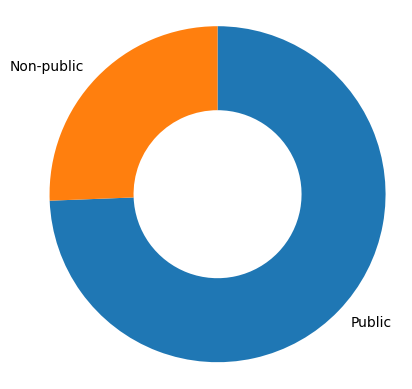

In [29]:
sorted_counts = score_dataset['school_type'].value_counts()
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90,
        counterclock = False, wedgeprops = {'width' : 0.5});
plt.axis('square');

## For the Numerical Columns:

Numerical Features:
- n_student
- pretest
- posttest


<function matplotlib.pyplot.show(close=None, block=None)>

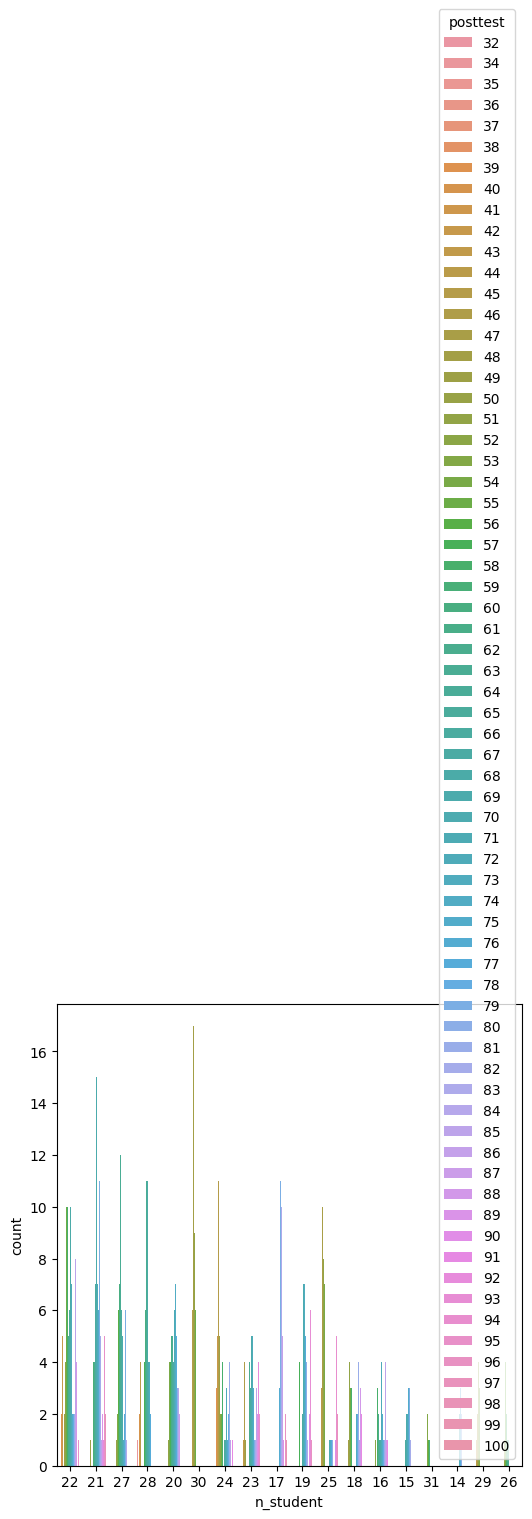

In [30]:
#making a countplot for "n_student" column with respect to "posttest" column
plt.figure(figsize=(6,6))
sns.countplot(x='n_student', data=score_dataset, order = score_dataset['n_student'].value_counts().index,
              hue=score_dataset['posttest'])
plt.show

# Data Encoding:

We have 7 Categorical Columns in the dataset.

Computers can understand only numerical data's, they can't understand text data's. So, we have to convert the categorical columns into numerical columns so that computer can understand. This is termed as Data Encoding in Machine Learning.here we have used one hot encoding

In [31]:
import pandas as pd
one_hot_encoded_data=pd.get_dummies(score_dataset,columns=['school','school_setting','school_type','classroom','teaching_method','gender','lunch'])
print(one_hot_encoded_data)#performing one hot encoding for the categorical feature


      n_student  pretest  posttest  school_ANKYI  school_CCAAW  school_CIMBB  \
0            22       53        62             0             0             0   
1            21       54        69             0             0             0   
2            21       62        72             1             0             0   
3            21       58        69             0             0             0   
4            28       52        59             0             0             0   
...         ...      ...       ...           ...           ...           ...   
2021         24       33        45             0             0             0   
2022         15       53        68             0             0             0   
2023         28       33        40             0             0             0   
2024         26       36        51             0             0             0   
2025         20       65        78             0             0             0   

      school_CUQAM  school_DNQDD  schoo

In [32]:
score_dataset=one_hot_encoded_data

In [33]:
# printing the first 5 rows of the dataframe
score_dataset.head()

,n_student,pretest,posttest,school_ANKYI,school_CCAAW,school_CIMBB,school_CUQAM,school_DNQDD,school_FBUMG,school_GJJHK,...,classroom_YUC,classroom_ZBH,classroom_ZDT,classroom_ZNS,teaching_method_Experimental,teaching_method_Standard,gender_Female,gender_Male,lunch_Does not qualify,lunch_Qualifies for reduced/free lunch
0,22,53,62,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,1,0
1,21,54,69,0,0,0,0,0,0,1,...,0,0,0,0,0,1,1,0,0,1
2,21,62,72,1,0,0,0,0,0,0,...,0,0,0,1,0,1,1,0,1,0
3,21,58,69,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,1,0
4,28,52,59,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,1,0


In [34]:
# printing the last 5 rows of the dataframe
score_dataset.tail()

,n_student,pretest,posttest,school_ANKYI,school_CCAAW,school_CIMBB,school_CUQAM,school_DNQDD,school_FBUMG,school_GJJHK,...,classroom_YUC,classroom_ZBH,classroom_ZDT,classroom_ZNS,teaching_method_Experimental,teaching_method_Standard,gender_Female,gender_Male,lunch_Does not qualify,lunch_Qualifies for reduced/free lunch
2021,24,33,45,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,1
2022,15,53,68,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,1
2023,28,33,40,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,1
2024,26,36,51,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,1
2025,20,65,78,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,1,0


In [35]:
# number of rows and columns
score_dataset.shape

(2026, 134)

In [36]:
score_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2026 entries, 0 to 2025
Columns: 134 entries, n_student to lunch_Qualifies for reduced/free lunch
dtypes: int64(3), uint8(131)
memory usage: 322.5 KB


There is no text data in any columns in score_dataset





In [37]:
score_dataset.corr()['posttest']#the correlation with the target variable

n_student                                -0.505762
pretest                                   0.951527
posttest                                  1.000000
school_ANKYI                              0.043920
school_CCAAW                              0.180962
                                            ...   
teaching_method_Standard                 -0.312110
gender_Female                            -0.002834
gender_Male                               0.002834
lunch_Does not qualify                    0.602951
lunch_Qualifies for reduced/free lunch   -0.602951
Name: posttest, Length: 134, dtype: float64

In [38]:
cor = score_dataset.corr()
#Correlation with output variable
cor_target = abs(cor["posttest"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.3]#choosing the
relevant_features

n_student                                 0.505762
pretest                                   0.951527
posttest                                  1.000000
school_GOOBU                              0.358480
school_IDGFP                              0.307869
school_KZKKE                              0.317906
school_UKPGS                              0.438616
school_VVTVA                              0.306937
school_setting_Suburban                   0.455322
school_setting_Urban                      0.334434
school_type_Non-public                    0.375162
school_type_Public                        0.375162
teaching_method_Experimental              0.312110
teaching_method_Standard                  0.312110
lunch_Does not qualify                    0.602951
lunch_Qualifies for reduced/free lunch    0.602951
Name: posttest, dtype: float64

In [39]:
best_features=["n_student",'pretest','school_GOOBU','school_IDGFP','school_KZKKE','school_UKPGS','school_VVTVA',
               'school_setting_Suburban','school_setting_Urban','school_type_Non-public','school_type_Public',
               'teaching_method_Experimental','teaching_method_Standard','lunch_Does not qualify',
               'lunch_Qualifies for reduced/free lunch']

# Splitting features and target:

In [40]:
X=score_dataset[best_features]
Y=score_dataset['posttest']
X_train, X_test, Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=62,shuffle=True)

In [41]:
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(1620, 15) (406, 15) (1620,) (406,)
